# Fit an existing model

## Select model

Let's play with some scientific useful model. First we import scientific solvers:

In [1]:
from scifit.solvers.scientific import *

And we select some model of interest such as the Hill model which says something like:

$$y = \frac{k \cdot x^n}{1 + k \cdot x^n}$$



In [2]:
solver = HillEquationFitSolver()

## Load data

Now we generate some synthetic dataset for a given problem:

In [3]:
data = solver.synthetic_dataset(
    xmin=0.0, xmax=5.0, dimension=1, resolution=50,
    parameters=[3.75, 0.21],
    sigma=0.1, scale_mode="auto", seed=1234,
)

In [4]:
data.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
48,4.795918,0.987759,0.049437,0.986855,0.000904
6,0.510204,0.060416,0.049437,0.016558,0.043858
49,4.897959,1.025186,0.049437,0.987841,0.037345
3,0.204082,0.071370,0.049437,0.000542,0.070828
39,3.877551,1.012899,0.049437,0.971290,0.041610


In [5]:
solver.store(data=data)

## Solve Fit

Everything is setup, we can solve our problem:

In [6]:
solution = solver.fit()

In [7]:
solver.solved()

True

In [8]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [9]:
print(solution["parameters"])

[3.87767573 0.19793709]


In [10]:
print(solution["covariance"])

[[ 0.04232867 -0.00421464]
 [-0.00421464  0.00056318]]


## Render solution

Finally we can render fit and loss function to check the dynamic:

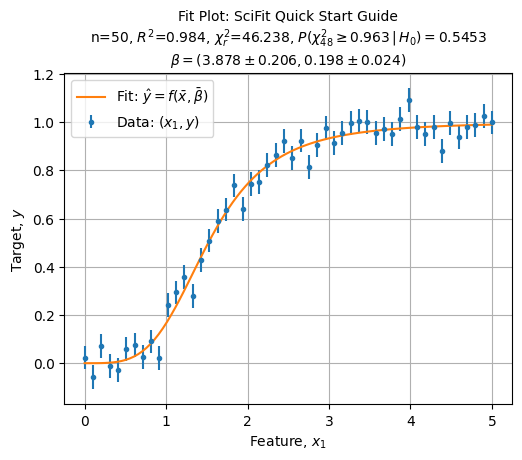

In [11]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

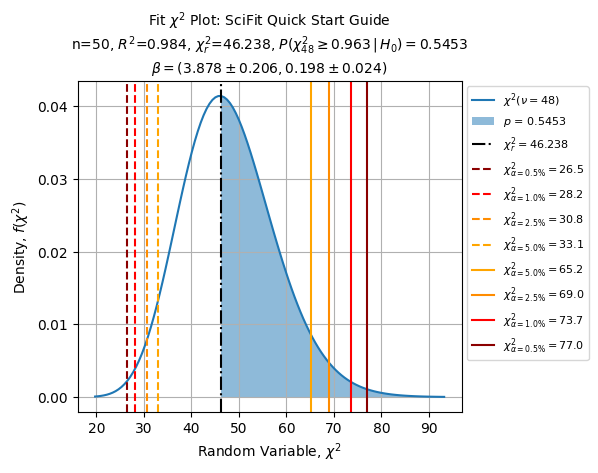

In [12]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

C:\Users\developer\AppData\Roaming\Python\Python310\site-packages\scifit\solvers\scientific.py:219: RuntimeWarning: divide by zero encountered in power
  term = k * np.power(x[:, 0], n)
C:\Users\developer\AppData\Roaming\Python\Python310\site-packages\scifit\solvers\scientific.py:220: RuntimeWarning: invalid value encountered in divide
  return term / (1 + term)


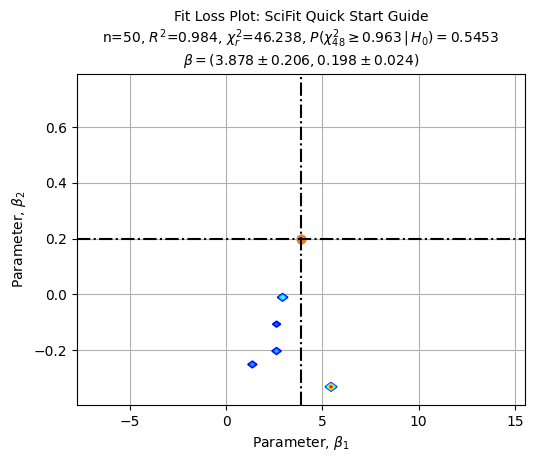

In [13]:
axe = solver.plot_loss(title="SciFit Quick Start Guide")

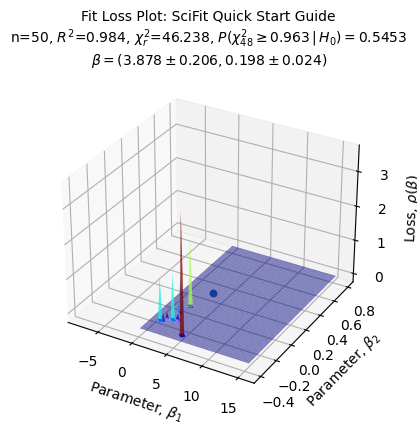

In [14]:
axe = solver.plot_loss_low_dimension(
    title="SciFit Quick Start Guide", surface=True
)